## 엔트로피의 정의

𝑌=0  또는  𝑌=1  인 두 가지 값을 가지는 확률변수의 확률분포가 다음과 같이 세 종류가 있다고 하자.

+ 확률분포  𝑌1 :  𝑃(𝑌=0)=0.5 ,  𝑃(𝑌=1)=0.5 
+ 확률분포  𝑌2 :  𝑃(𝑌=0)=0.8 ,  𝑃(𝑌=1)=0.2 
+ 확률분포  𝑌3 :  𝑃(𝑌=0)=1.0 ,  𝑃(𝑌=1)=0.0

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

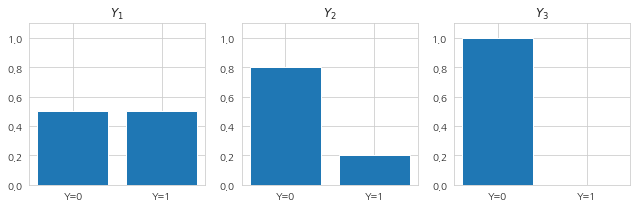

In [7]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar([0, 1], [0.5, 0.5])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_1$")

plt.subplot(132)
plt.bar([0, 1], [0.8, 0.2])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_2$")

plt.subplot(133)
plt.bar([0, 1], [1.0, 0])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_3$")

plt.tight_layout()
plt.show()

베이지안 관점에서 위 확률분포는 다음과 같은 정보를 나타낸다.

+ 확률분포  𝑌1 은  𝑦 값에 대해 아무것도 모르는 상태
+ 확률분포  𝑌2 은  𝑦 값이 0이라고 믿지만 아닐 가능성도 있다는 것을 아는 상태
+ 확률분포  𝑌3 은  𝑦 값이 0이라고 100% 확신하는 상태

###### 확률분포가 가지는 정보의 확신도 혹은 정보량을 수치로 표현한 것이 엔트로피(entropy)다. 

##### 확률분포에서 특정한 값이 나올 확률이 높아지고 나머지 값의 확률은 낮아진다면 엔트로피가 작아진다. 

##### 반대로 여러가지 값이 나올 확률이 대부분 비슷한 경우에는 엔트로피가 높아진다.

확률분포의 엔트로피는 물리학의 엔트로피 용어를 빌려온 것이다. 물리학에서는 물질의 상태가 분산되는 정도를 엔트로피로 정의한다. 물체의 상태가 여러가지로 고루 분산되어 있으면 엔트로피가 높고 특정한 하나의 상태로 몰려있으면 엔트로피가 낮다.

수학적으로 엔트로피는 확률분포함수를 입력으로 받아 숫자를 출력하는 범함수(functional)로 정의한다.  𝐻[] 기호로 표기한다.

확률변수  𝑌 가 카테고리분포와 같은 이산확률변수이면 다음처럼 정의한다.

$$H[Y] = -\sum_{k=1}^K p(y_k) \log_2 p(y_k)$$

이 식에서  𝐾 는  𝑋 가 가질 수 있는 클래스의 수이고  𝑝(𝑦) 는 확률질량함수다.

확률변수  𝑌 가 정규분포와 같은 연속확률변수이면 다음처럼 정의한다.

$$H[Y] = -\int_{-\infty}^{\infty} p(y) \log_2 p(y) \; dy$$

이 식에서  𝑝(𝑦) 는 확률밀도함수다.

로그의 밑(base)이 2로 정의된 것은 정보통신과 관련을 가지는 역사적인 이유때문이다.

위에서 예를 든  𝑌1 ,  𝑌2 ,  𝑌3  3 개의 확률분포에 대해 엔트로피는 구하면 다음과 같다.

$$H[Y_1] = -\dfrac{1}{2} \log_2 \dfrac{1}{2} -\dfrac{1}{2} \log_2 \dfrac{1}{2} = 1$$

$$H[Y_2] = -\dfrac{8}{10} \log_2 \dfrac{8}{10} -\dfrac{2}{10} \log_2 \dfrac{2}{10} = 0.72$$

$$H[Y_3] = -1 \log_2 1 -0 \log_2 0 = 0$$

엔트로피 계산에서  𝑝(𝑦)=0 인 경우에는 로그값이 정의되지 않으므로 다음과 같은 극한값을 사용한다.

$$\lim_{p\rightarrow 0} \; p\log_2{p} = 0$$

이 값은 로피탈의 정리(l'Hôpital's rule)에서 구할 수 있다.

넘파이로 엔트로피를 구하면 다음과 같다. 확률값이 0일 때는 가장 작은 값인 eps를 대신 사용한다.

In [9]:
-0.5 * np.log2(0.5) - 0.5 * np.log2(0.5)

1.0

In [11]:
-0.8 * np.log2(0.8) - 0.2 * np.log2(0.2)

0.7219280948873623

In [13]:
eps = np.finfo(float).eps

-1 * np.log2(1) - eps * np.log2(eps)

1.1546319456101628e-14

### Practice 1

두 가지 값을 가질 수 있는 베르누이분포에서 확률값  𝑃(𝑌=1) 은 0부터 1까지의 값을 가질 수 있다. 각각의 확률분포에 대해 엔트로피를 계산하여 가로축이  𝑃(𝑌=1) 이고 세로축이  𝐻[𝑌] 인 그래프를 그려라.

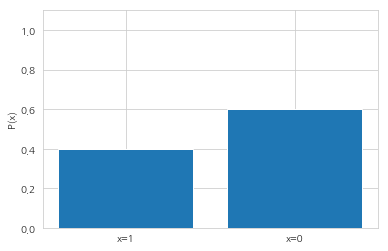

In [21]:
import scipy as sp
import scipy.stats

xx = [0, 1]

px = sp.stats.bernoulli(0.6).pmf(xx)

plt.bar(xx, px)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.ylabel("P(x)")
plt.ylim(0, 1.1)
plt.show()

In [67]:
eps = np.finfo(float).eps

def entropy(x):
    if ((x == 0) | ((1-x) == 0)):
        return -eps * np.log2(eps) - 1 * np.log2(1)

    return -x * np.log2(x) - (1-x) *np.log2(1-x)

p_y_1 = np.arange(0, 1.1, 0.1)

entropys = []

for i in p_y_1:
    entropys.append(entropy(i))

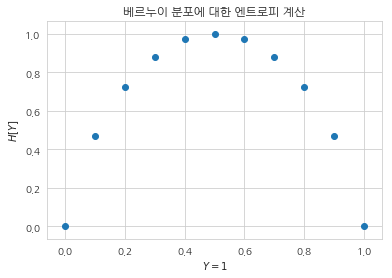

In [68]:
plt.scatter(p_y_1, entropys)
plt.xlabel("$Y=1$")
plt.ylabel("$H[Y]$")
plt.title("베르누이 분포에 대한 엔트로피 계산")
plt.show()

### Practice 2

다음 확률분포의 엔트로피를 계산하라.

(1)  𝑃(𝑌=0)=1/8,𝑃(𝑌=1)=1/8,𝑃(𝑌=2)=1/4,𝑃(𝑌=3)=1/2 

(2)  𝑃(𝑌=0)=1,𝑃(𝑌=1)=0,𝑃(𝑌=2)=0,𝑃(𝑌=3)=0 

(3)  𝑃(𝑌=0)=1/4,𝑃(𝑌=1)=1/4,𝑃(𝑌=2)=1/4,𝑃(𝑌=3)=1/4

In [72]:
-(1/8) * np.log2(1/8) - (1/8) * np.log2(1/8) - (1/4) * np.log2(1/4) - (1/2) * np.log2(1/2)

1.75

In [73]:
1 / 8 + 1/8 + 1/4 + 1/2

1.0

In [74]:
eps = np.finfo(float).eps
-1 * np.log2(1) - eps * np.log2(eps) - eps * np.log2(eps) - eps * np.log2(eps)

3.4638958368304884e-14

In [80]:
-(1/4) * np.log2(1/4) * 4

2.0

## 엔트로피의 성질

확률변수가 결정론적이면 확률분포에서 특정한 하나의 값이 나올 확률이 1이다. 이 때 엔트로피는 0이 되고 이 값은 엔트로피가 가질 수 있는 최솟값이다.

반대로 엔트로피의 최대값은 이산 확률변수의 클래스의 갯수에 따라 달라진다. 만약 이산확률분포가 가질 수 있는 값이  2𝐾 개면 엔트로피의 최대값은 각 값에 대한 확률이 모두 같은 값인  1/2𝐾 이다. 엔트로피의 값은

$$H = -2^K \cdot \frac{1}{2^K}\log_2\dfrac{1}{2^K} = K$$

이다.

## 엔트로피의 추정

이론적인 확률밀도함수가 없고 실제 데이터가 주어진 경우에는 데이터에서 확률질량함수를 추정한 후, 이를 기반으로 엔트로피를 추정한다.

예를 들어 데이터가 모두 80개가 있고 그 중 Y = 0 인 데이터가 40개, Y = 1인 데이터가 40개 있는 경우는 엔트로피가 1이다.

$$P(y=0) = \dfrac{40}{80} = \dfrac{1}{2}$$

$$P(y=1) = \dfrac{40}{80} = \dfrac{1}{2}$$

$$H[Y] = -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) = \dfrac{1}{2} + \dfrac{1}{2}  = 1$$

SciPy의 stats 서브패키지는 엔트로피를 구하는 entropy 함수를 제공한다. base 인수값은 2가 되어야 한다.

In [81]:
p = [0.5, 0.5]
sp.stats.entropy(p, base=2)

1.0

### Practice 3

(1) 데이터가 모두 60개가 있고 그 중  𝑌=0 인 데이터가 20개,  𝑌=1 인 데이터가 40개 있는 경우의 엔트로피를 계산하라.

(2) 데이터가 모두 40개가 있고 그 중  𝑌=0 인 데이터가 30개,  𝑌=1 인 데이터가 10개 있는 경우의 엔트로피를 계산하라.

(3) 데이터가 모두 20개가 있고 그 중  𝑌=0 인 데이터만 20개 있는 경우의 엔트로피를 계산하라.

In [82]:
p = [20/60, 40/60]
sp.stats.entropy(p, base=2)

0.9182958340544894

In [83]:
p = [30/40, 10/40]
sp.stats.entropy(p, base=2)

0.8112781244591328

In [84]:
p = [20/20, 0]
sp.stats.entropy(p, base=2)

0.0

## 가변길이 인코딩

엔트로피는 원래 통신 분야에서 데이터가 가지고 있는 정보량을 계산하기 위해 고안되었다. 예를 들어 4개의 글자 A, B, C, D로 씌여진 다음과 같은 문서가 있다고 하자.

In [86]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list("".join([int(N * p[i]) * c for i, c in enumerate("ABCD")]))  # A, B, C, D 글자에 확률을 적용하여 200개 데이터를 생성
len(doc0)

200

In [87]:
doc = "".join(doc0)
doc

'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCDDDDDDDDDDDDDDDDDDDDDDDDD'

이 문서를 0과 1로 이루어진 이진수로 변환하면 보통 다음과 같이 인코딩한다.

+ A = "00"
+ B = "01"
+ C = "10"
+ D = "11"

이렇게 인코딩을 하면 200 글자로 이루어진 문서는 이진수 400개가 된다.

In [88]:
encoder = {"A": "00", "B": "01", "C": "10", "D": "11"}
encoded_doc = "".join([encoder[c] for c in doc])
encoded_doc

'0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101011010101010101010101010101010101010101010101010101011111111111111111111111111111111111111111111111111'

In [89]:
len(encoded_doc)

400

그런데 이진수로 변환할 때 더 글자수를 줄일 수 있는 방법이 있다. 우선 위 글자의 분포를 조사하면 다음과 같다.

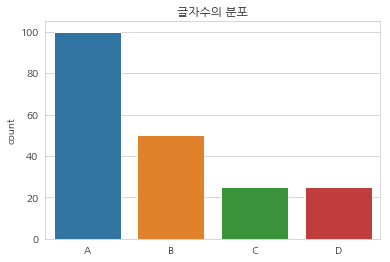

In [90]:
sns.countplot(list(doc), order="ABCD")
plt.title("글자수의 분포")
plt.show()

글자의 분포가 다음과 같다.

$$P(Y=A)=\dfrac{1}{2}, P(Y=B)=\dfrac{1}{4}, P(Y=C)=\dfrac{1}{8}, P(Y=D)=\dfrac{1}{8} $$

지프의 법칙(Zipf's law), 혹은 파레토 법칙(Pareto's law)에 따르면 이러한 분포는 현실의 글자 빈도수에서도 흔히 나타나므로 비현실적인 가정은 아니다.

확률분포가 이렇게 균등하지 않을 때는 다음처럼 인코딩하면 인코딩된 후의 이진수 수를 줄일 수 있다.

+ A = "0"
+ B = "10"
+ C = "110"
+ D = "111"



이 방법은 글자마다 인코딩하는 이진수의 숫자가 다르기 때문에 가변길이 인코딩(variable length encoding)이라고 한다. "C", "D"는 이진수의 수가 3개로 많지만 글자의 빈도가 적어서 영향이 적다. 반대로 가장 많이 출현하는 "A"는 두 글자가 아닌 한 글자이므로 인코딩 후의 이진수 수가 감소한다.

만약 문서의 분포가 위에서 가정한 분포와 정확하게 같다면 인코딩된 이진수의 숫자는 다음 계산에서 350개가 됨을 알 수 있다.

$$\left(200 \times \dfrac{1}{2}\right) \cdot 1 + 
\left(200 \times \dfrac{1}{4}\right) \cdot 2 + 
\left(200 \times \dfrac{1}{8}\right) \cdot 3 + 
\left(200 \times \dfrac{1}{8}\right) \cdot 3 = 350$$

##### 따라서 알파벳 한 글자를 인코딩하는데 필요한 평균 비트(bit)수는  350÷200=1.75 이고 이 값은 확률변수의 엔트로피 값과 같다.

$$H = -\dfrac{1}{2}\log_2\dfrac{1}{2} -\dfrac{1}{4}\log_2\dfrac{1}{4} -\dfrac{2}{8}\log_2\dfrac{1}{8} = 1.75$$

In [92]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/8], base=2)

1.75

In [93]:
vl_encoder = {"A": "0", "B": "10", "C": "110", "D": "111"}
vl_encoder_doc = "".join([vl_encoder[c] for c in doc])
vl_encoder_doc

'00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010110110110110110110110110110110110110110110110110110110110110110110110110110111111111111111111111111111111111111111111111111111111111111111111111111111'

In [94]:
len(vl_encoder_doc)

350

### Practice 4

A, B, C, D, E, F, G, H의 8글자로 이루어진 문서가 있고 각각의 글자가 나올 확률이 다음과 같다고 가정하자.

$$\Big\{ \dfrac{1}{2}, \dfrac{1}{4}, \dfrac{1}{8}, \dfrac{1}{16}, \dfrac{1}{64}, \dfrac{1}{64}, \dfrac{1}{64}, \dfrac{1}{64} \Big\}$$

이 문서를 위한 가변 길이 인코딩 방식을 서술하고 한 글자를 인코딩하는데 필요한 평균 비트수를 계산하라.

In [95]:
p = [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64]

sp.stats.entropy(p, base=2)

2.0

## 지니불순도

엔트로피와 유사한 개념으로 지니불순도(Gini impurity)라는 것이 있다. 지니불순도는 엔트로피처럼 확률분포가 어느 쪽에 치우쳐 있는가를 재는 척도지만 로그를 사용하지 않아 계산량이 더 적어 엔트로피 대용으로 많이 사용된다. 경제학에서도 사용되지만 지니계수(Gini coefficient)와는 다른 개념이라는 점에 주의해야 한다.

$$G[Y] = \sum_{k=1}^K P(y_k) (1 - P(y_k))$$

다음 그림은 값이 두 개인 이산확률분포에서 지니불순도와 엔트로피를 비교한 결과다.

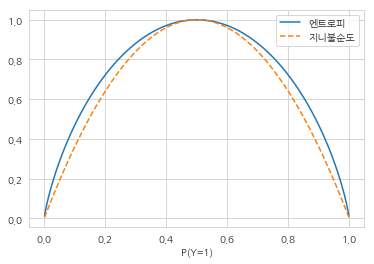

In [98]:
P0 = np.linspace(0.001, 1 - 0.001, 1000)
P1 = 1 - P0
H = -P0 * np.log2(P0) - P1 * np.log2(P1)
G = 2 * (P0 * (1 - P0) + P1 * (1 - P1))

plt.plot(P1, H, "-", label="엔트로피")
plt.plot(P1, G, "--", label="지니불순도")
plt.xlabel("P(Y=1)")
plt.legend()
plt.show()

## 엔트로피 최대화

###### 기댓값 0, 분산  𝜎2 이 주어졌을 때 엔트로피  H[𝑝(𝑥)] 를 가장 크게 만드는 확률밀도함수  𝑝(𝑥) 는 정규분포가 된다. 

이는 다음과 같이 증명한다.

우선 확률밀도함수가 지켜야할 제한조건은 다음과 같다.

(1) 확률밀도함수의 총면적은 1

$$\int_{-\infty}^{\infty} p(x) dx = 1$$

(2) 기댓값은 0

$$\int_{-\infty}^{\infty} xp(x) dx = 00$$
 
(3) 분산은  𝜎2 

$$\int_{-\infty}^{\infty} x^2 p(x) dx = \sigma^2 $$

최대화할 목적범함수(objective functional)은 엔트로피다.

$$\text{H}[p(x)] = -\int_{-\infty}^{\infty} p(x)\log p(x) dx$$

라그랑주 승수법으로 제한조건을 추가하면 다음과 같아진다.

\begin{aligned}
\text{H}[p(x)] 
&= -\int_{-\infty}^{\infty} p(x)\log p(x) dx + \lambda_1 \left( \int_{-\infty}^{\infty} p(x) dx - 1 \right) \\
& + \lambda_2 \left( \int_{-\infty}^{\infty} xp(x) dx\right)
 + \lambda_3 \left( \int_{-\infty}^{\infty} x^2 p(x) dx - \sigma^2 \right) \\
&= \int_{-\infty}^{\infty} \left(
-p(x)\log p(x) + \lambda_1 p(x) + \lambda_2 xp(x) + \lambda_3 x^2p(x) 
- \lambda_1 - \lambda_3 \sigma^2
\right) dx
\end{aligned}

변분법에서 도함수는 다음과 같이 계산된다.

$$\dfrac{\delta H}{\delta p(x)} = 
-\log p(x) - 1 + \lambda_1 + \lambda_2 x + \lambda_3 x^2 = 0$$

따라서 확률밀도함수의 형태는 다음과 같다.

$$p(x) = \exp \left( - 1 + \lambda_1 + \lambda_2 x + \lambda_3 x^2 \right)$$

적분을 통해 위 형태의 확률밀도함수의 면적, 기대값, 분산을 계산하고 주어진 제한조건을 만족하도록 연립방정식을 풀면 라그랑주 승수를 다음처럼 구할 수 있다. 이 과정은 이 책의 범위를 벗어나므로 생략한다.

\begin{aligned}
\lambda_1 &= 1-\dfrac{1}{2} \log{2\pi\sigma^2} \\
\lambda_2 &= 0 \\
\lambda_3 &= -\dfrac{1}{2\sigma^2} \\
\end{aligned}

이 값을 대입하면 정규분포라는 것을 알 수 있다.

$$p(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\dfrac{x^2}{2\sigma^2} \right)$$

### Practice 5
정규분포의 확륲밀도함수에 대한 엔트로피값이 다음과 같음을 증명하라.

$$p(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\dfrac{x^2}{2\sigma^2} \right)$$

$$\text{H}[p(x)] = \dfrac{1}{2} ( 1 + \log 2\pi\sigma^2 )$$